# Sanofi Paul Ricard
This notebook is being used to generate a nice image of cars around the Paul Ricard ciruit.

In [11]:
# import libraries
import plotly.graph_objects as go
import pandas as pd
import fastf1 as ff1
import numpy as np
import os

In [12]:
# this dir should point at where ever your sanofi Mclaren directory is syncing
# dir = "C:/Users/mark_/Sanofi/Sanofi x McLaren sharing - General/Race Dashboard data/"

from sys import platform
if platform == "linux" or platform == "linux2":
    # linux
    # dir = "/Users/mark/Documents/GitHub/raceDashboard/Race Dashboard data/"
    dir = "/media/psf/Home/Documents/GitHub/raceDashboard/"

elif platform == "darwin":
    # OS X
    dir = "/Users/mark/Documents/GitHub/raceDashboard/"
elif platform == "win32":
    # Windows...
    dir = "C:/Users/mark_/Documents/McLaren2021/Sanofi/"
    # dir = "C:/Users/mark_/Sanofi/Sanofi x McLaren sharing - General/Race Dashboard data/"

    # dir = 'C:/Users/james.blood/Documents/McLarenSanofi/McLarenSanofi/data/'

    
# write out the files where ever you like.  As long as same file is used within Tableau.

folder = 'Race Dashboard Data'

filename = os.path.join(dir, folder, 'leaderboard.csv')

df = pd.read_csv(filename)
df.head()


,Unnamed: 0,Line,2021-04-15 00:00:00,2021-05-13 00:00:00,2021-06-10 00:00:00,2021-07-08 00:00:00,2021-08-19 00:00:00,race_time,prev_race_time,Plant,position,gap_to_leader,prev_position,Gain/Loss,interval,OEE Start point,⇗ OEE% progress,OEE% Target (2022)
0,0,GAMMA1,89.149792,79.525767,79.076756,64.979194,76.634297,389.365808,312.731510,SCOPPITO,1,0.000000,1,0,NaN,0.418683,0.103565,0.650
1,1,IMA C80/2,88.906482,79.456522,82.482693,64.674113,75.994197,391.514006,315.519809,SCOPPITO,2,2.148199,2,0,2.148199,0.451031,0.217130,0.650
2,2,AL6,89.134076,90.323044,87.005598,75.552144,70.466626,412.481488,342.014862,Frankfurt,3,23.115680,4,1,20.967481,0.332657,0.040147,0.485
3,3,C9 Packaging Line,88.908883,89.747841,90.361488,72.580804,72.783181,414.382196,341.599016,Maisons-Alfort,4,25.016389,3,-1,1.900708,0.419899,0.154313,0.530
4,4,AL5 Packaging 1,89.124625,89.725754,90.495004,75.207724,71.378720,415.931827,344.553107,Frankfurt,5,26.566019,5,0,1.549631,0.479693,-0.010211,0.500


In [70]:
# trying the iloc 
# cars = df[['Line', 'position']]
# cars.columns = [*cars.columns[:-1], 'position']
car = cars.sort_values(by=[cars.columns[1]], inplace=True)
cars['position'] = np.arange(1,len(cars) + 1)
cars.drop(columns=(cars.columns[1]), inplace=True)
cars

/tmp/ipykernel_9542/3845565982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car = cars.sort_values(by=[cars.columns[1]], inplace=True)
/tmp/ipykernel_9542/3845565982.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['position'] = np.arange(1,len(cars) + 1)
/home/parallels/.local/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

,Line,position
2,AL6,1
4,AL5 Packaging 1,2
3,C9 Packaging Line,3
1,IMA C80/2,4
0,GAMMA1,5
5,L18 Packaging Line,6
6,M22 Filling,7
7,M21 Filling,8
9,C2 Packaging Line,9
10,M18 Filling,10


In [63]:
# ff1.Cache.enable_cache('f1_cache')
folder = 'f1_cache'

cache_dir = os.path.join(dir, folder)

ff1.Cache.enable_cache(cache_dir)
laps = ff1.get_session(2020, 'Belgium', 'R').load_laps(with_telemetry=True)
tel = laps.pick_driver('NOR').pick_fastest().telemetry

core           INFO 	Loading laps for Belgian Grand Prix - Race [v2.1.7]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 19 drivers: ['23', '77', '5', '7', '6', '10', '3', '20', '31', '18', '8', '16', '63', '33', '26', '11', '44', '4', '99']


In [64]:
import matplotlib.pyplot as plt

In [65]:
plt.style.use('dark_background')

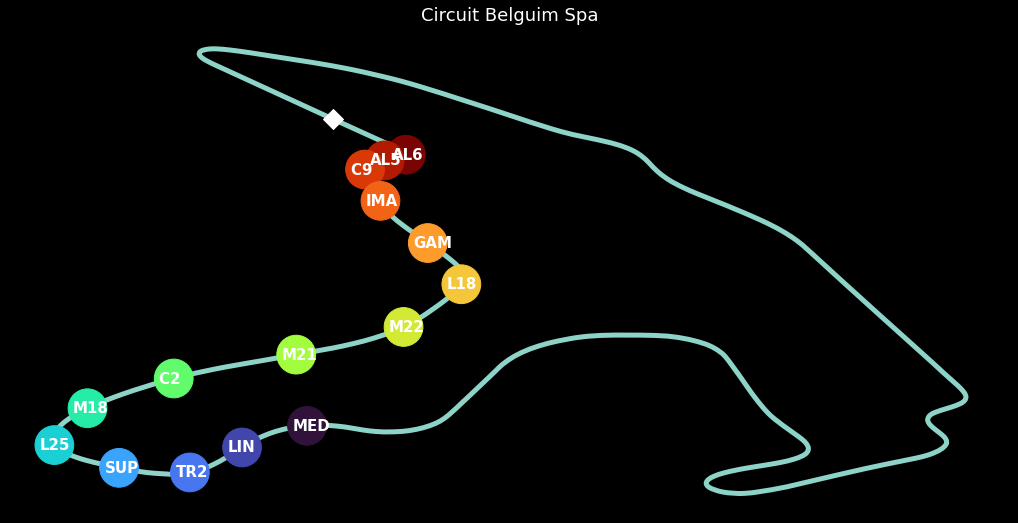

In [74]:
plt.figure(figsize=(18,9))
plt.plot(tel.X, tel.Y, zorder=1, lw=5)


result_x=[]
result_y=[]

t = np.linspace(1,15,len(cars))

# im = plt.imread(dir + 'chequeredFlag.png')
# plt.imshow(im,zorder=1)  

# spaces the cars out around the track
multiplier=-20
# more micro adjustment of car positioning
offset_for_cars=1

# show where the start / finish line is
start_x=[]
start_y=[]
start_x.__iadd__([tel.X.iloc[int(1)]])
start_y.__iadd__([tel.Y.iloc[int(1)]])


for i, row in cars.iterrows():
    # result_x.__iadd__([tel.X.iloc[int(-15*(row[1]+1))]])
    # result_y.__iadd__([tel.Y.iloc[int(-15*(row[1]+1))]])
    result_x.__iadd__([tel.X.iloc[int(multiplier*(row[1]+1))-offset_for_cars]])
    result_y.__iadd__([tel.Y.iloc[int(multiplier*(row[1]+1))-offset_for_cars]])
    

plt.scatter(result_x, result_y, s=1500, c=t, cmap='turbo_r', zorder=2)
font = {'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)

for i, row in cars.iterrows():
    # plt.text(tel.X.iloc[int(-15*(row[1]+1))]-250, tel.Y.iloc[int(-15*(row[1]+1))]-200, row[0][:3], c='white')
    plt.text(tel.X.iloc[int(multiplier*(row[1]+1))-offset_for_cars]-200, tel.Y.iloc[int(multiplier*(row[1]+1))-offset_for_cars]-200, row[0][:3], c='white')

plt.scatter(start_x, start_y, marker = 'D', c='white', zorder=2, s=200)
    
# grid(color='r', linestyle='-', linewidth=2)
# plt.scatter(300, -1930, marker = 's', c='white', zorder=2)
# plt.scatter(600, -1930, marker = 's', c='white', zorder=2)
# plt.scatter(460, -2130, marker = 's', c='white', zorder=2)
# plt.scatter(300, -2130, marker = 's', c='black', zorder=2)  
# plt.scatter(460, -1930, marker = 's', c='black', zorder=2)  
# plt.scatter(600, -2130, marker = 's', c='black', zorder=2)  
    
# for i, row in cars.iterrows():
#     plt.scatter(tel.X.iloc[int(-15*(row[1]+1))], tel.Y.iloc[int(-15*(row[1]+1))], s = 1000, c=t, cmap='Oranges', zorder=2)
#     plt.text(tel.X.iloc[int(-15*(row[1]+1))]-200, tel.Y.iloc[int(-15*(row[1]+1))], row[0][:3], c='white')

plt.title('Circuit Belguim Spa')
plt.axis('off')
plt.show()

In [75]:
tel.Y.iloc[-1]

1266

NameError: name 'df_weekly' is not defined